# <div align="center">Text Analysis With NLTK</div>

##### <div align="center"> Import libraries</div>

In [1]:
import pandas as pd
import numpy as np
import warnings
from nltk.tokenize import word_tokenize, sent_tokenize # spliting string into substrings
from nltk.corpus import stopwords # for removing stop words
from nltk import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from nltk import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree
import string, re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', -1)

Read data to pandas dataframe

In [4]:
df=pd.read_csv('./datasets/spam.csv')

##### <div align="center">Inspect Data</div>

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.isnull().sum()

v1            0   
v2            0   
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Remove unused columns

In [9]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [11]:
df.columns=['target','text']

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Number of text in each target

In [13]:
df.groupby(['target'])['target'].count()

target
ham     4825
spam    747 
Name: target, dtype: int64

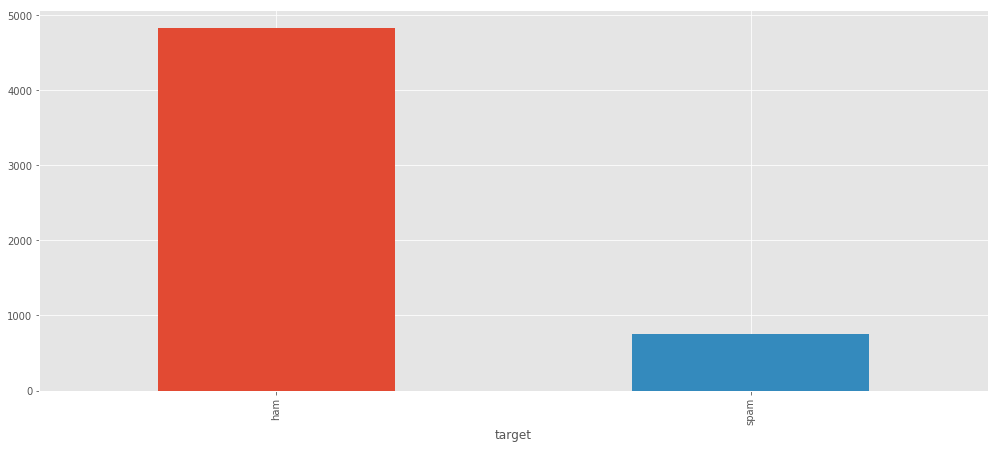

In [72]:
df.groupby(['target'])['target'].count().plot(kind='bar',figsize=(17,7))

In [15]:
df.groupby(['target'])['target'].count()/df['target'].count() *100

target
ham     86.593683
spam    13.406317
Name: target, dtype: float64

In [16]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


##### <div align="center">Remove punctation</div>

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [19]:
df['text_without_punctuations']=df['text'].apply(lambda x: remove_punctuation(x))

In [20]:
df.head()

,target,text,text_without_punctuations
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


##### <div align="center">Remove words with less than 2 characters</div>

In [21]:
def words_less_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>2])

In [22]:
df['text_without_punctuations']=df['text_without_punctuations'].apply(lambda x: words_less_than_three_chars(x))
df.head()

,target,text,text_without_punctuations
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis great world la buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think he goes to usf he lives around here though


##### <div align="center">Convert the text into lower case</div>

In [23]:
def convert_to_lower_case(text):
    return "".join([t.lower() for t in text])

In [24]:
df['text_in_lower_case']=df['text_without_punctuations'].apply(lambda x: convert_to_lower_case(x))

df.head()

##### <div align="center">Tokenize text into words</div>

In [25]:
def text_tokenizaion(text):
    return re.split(' ',text)

In [26]:
df['tokenized_text']=df['text_in_lower_case'].apply(lambda x: text_tokenizaion(x))

In [27]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis great world la buffet Cine there got amore wat,go until jurong point crazy available only in bugis great world la buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif oni,ok lar joking wif oni,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say,dun say so early hor already then say,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think he goes to usf he lives around here though,nah dont think he goes to usf he lives around here though,"[nah, dont, think, he, goes, to, usf, he, lives, around, here, though]"


##### <div align="center">Remove stop words</div>

In [28]:
stopwords.words("english")[0:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
def remove_stopwords(text):
    return [w for w in text if w not in stopwords.words('english')]

In [30]:
df['text_without_stopwords']=df['tokenized_text'].apply(lambda x:remove_stopwords(x))

In [31]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis great world la buffet Cine there got amore wat,go until jurong point crazy available only in bugis great world la buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, great, world, la, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif oni,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say,dun say so early hor already then say,"[dun, say, so, early, hor, already, then, say]","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think he goes to usf he lives around here though,nah dont think he goes to usf he lives around here though,"[nah, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


##### <div align="center">Normalize text with lemmatization</div>

In [32]:
def text_lematization(text):
    return [WordNetLemmatizer().lemmatize(w) for w in text]

In [33]:
df['lemmatized_text']=df['text_without_stopwords'].apply(lambda x: text_lematization(x))

In [34]:
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis great world la buffet Cine there got amore wat,go until jurong point crazy available only in bugis great world la buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, great, world, la, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, great, world, la, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif oni,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say,dun say so early hor already then say,"[dun, say, so, early, hor, already, then, say]","[dun, say, early, hor, already, say]","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think he goes to usf he lives around here though,nah dont think he goes to usf he lives around here though,"[nah, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


##### <div align="center">Total words</div>

In [35]:
text_list=[]  
for index, row in df.iterrows(): 
    text_list.append(" ".join(row['lemmatized_text'])) 
text_list

total_words=' '.join(text_list)
total_words=word_tokenize(total_words)
# print(total_words)

##### <div align="center">Frequent Words</div>

In [36]:
freq_words=FreqDist(total_words)
freq_words

FreqDist({'call': 600, 'im': 462, 'get': 397, 'ur': 384, 'go': 304, 'dont': 279, 'ok': 277, 'ltgt': 276, 'free': 275, 'know': 267, ...})

Frequent Word Count

In [37]:
unique_words=len(freq_words)
unique_words

8879

In [38]:
df['text_in_lower_case'].head()

0    go until jurong point crazy available only in bugis great world la buffet cine there got amore wat                                               
1    ok lar joking wif oni                                                                                                                            
2    free entry in wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3    dun say so early hor already then say                                                                                                            
4    nah dont think he goes to usf he lives around here though                                                                                        
Name: text_in_lower_case, dtype: object

In [39]:
word_frequency=FreqDist(freq_words)
word_frequency

FreqDist({'call': 600, 'im': 462, 'get': 397, 'ur': 384, 'go': 304, 'dont': 279, 'ok': 277, 'ltgt': 276, 'free': 275, 'know': 267, ...})

##### <div align="center">Most common words used</div>

In [40]:
word_frequency.most_common(5)

[('call', 600), ('im', 462), ('get', 397), ('ur', 384), ('go', 304)]

Visualize most common words

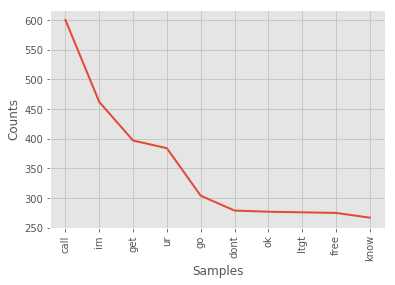

In [41]:
word_frequency.plot(10)
plt.show()

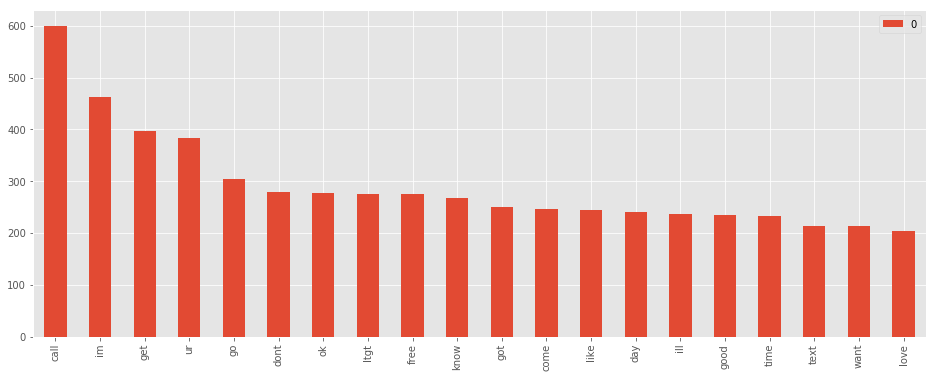

In [42]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6))

Using Word Cloud to visualize most commo words

In [43]:
# Install wordcoud library
# !pip install wordcloud

In [44]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

Word cloud from both spam and ham text

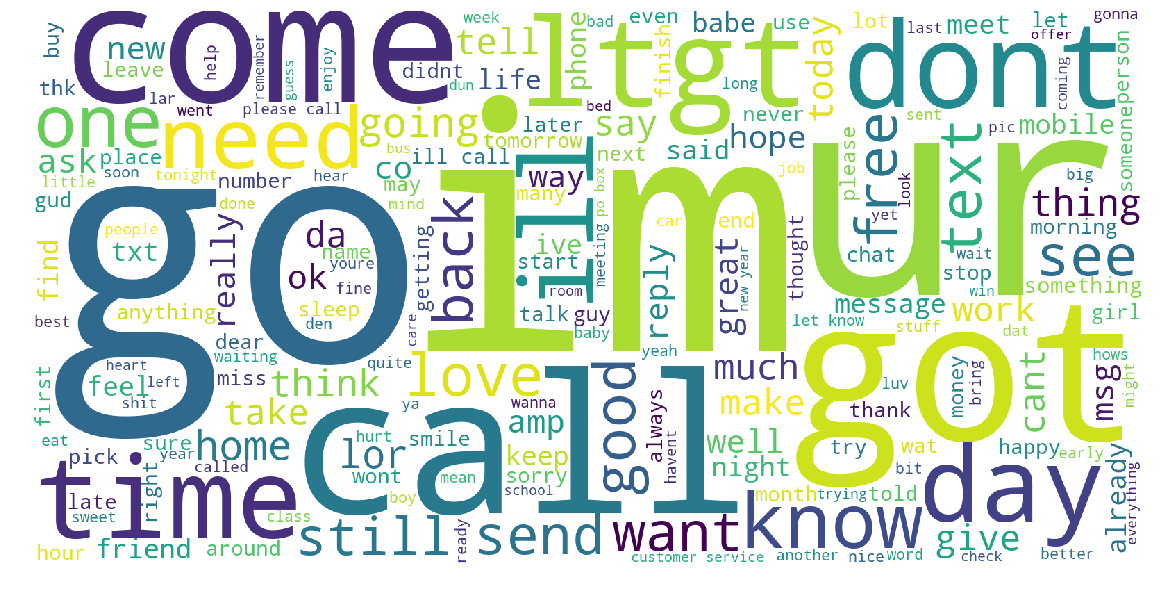

In [45]:
word_cloud_text_list_all=[]  
for index, row in df.iterrows(): 
    word_cloud_text_list_all.append(" ".join(row['lemmatized_text'])) 
word_cloud_text_list_all

wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_text_list_all)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word cloud from spam text

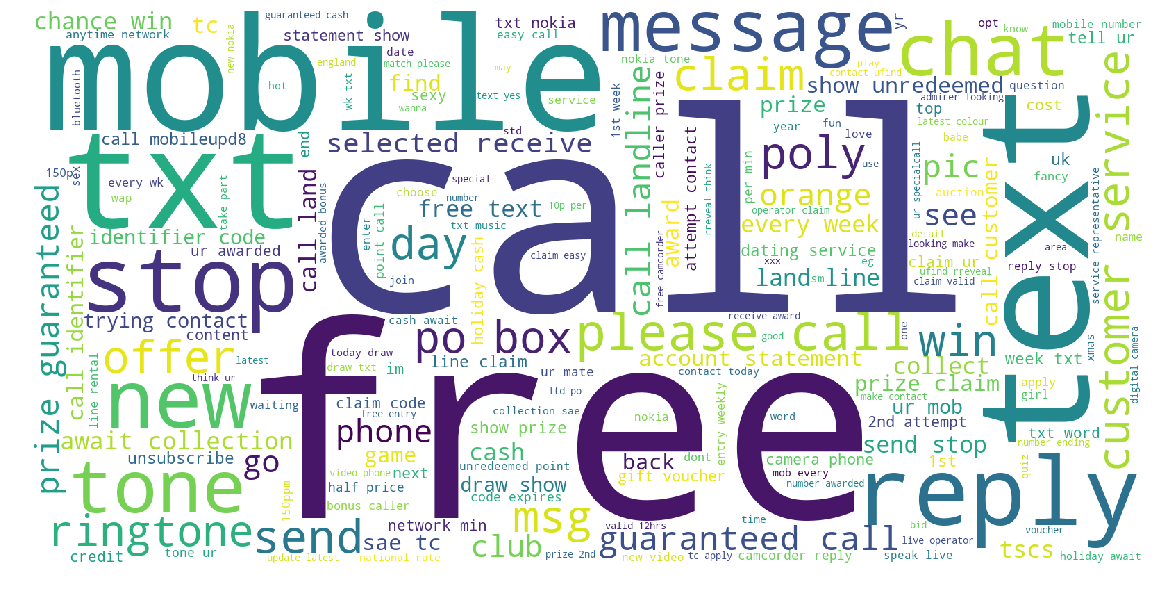

In [46]:
spam_df=df[df['target']=='spam']
word_cloud_text_list_spam=[]  
for index, row in spam_df.iterrows(): 
    word_cloud_text_list_spam.append(" ".join(row['lemmatized_text'])) 
word_cloud_text_list_spam


wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_text_list_spam)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word cloud from ham text

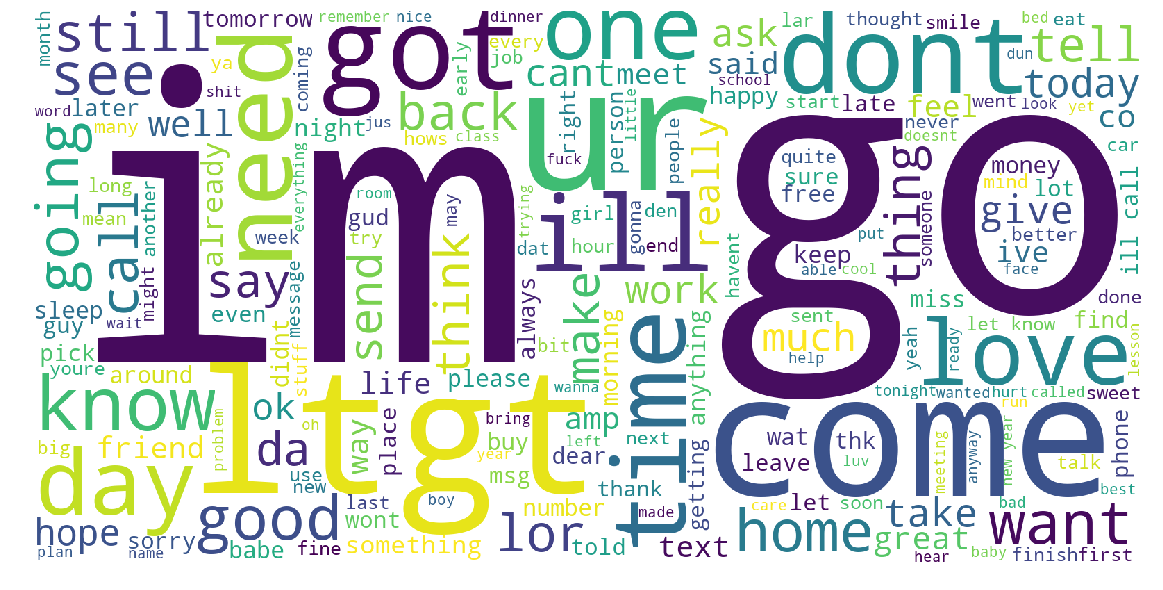

In [47]:
ham_df=df[df['target']=='ham']
word_cloud_text_list_ham=[]  
for index, row in ham_df.iterrows(): 
    word_cloud_text_list_ham.append(" ".join(row['lemmatized_text'])) 

wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_text_list_ham)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

##### <div align="center">Part-of-SPeech Tagging (POS)<div>

Count POS Tags

In [48]:
# POS Tagging
tags=pos_tag(total_words)
print(tags[0:10])

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('buffet', 'FW')]


In [49]:
counter=Counter(tag for word,tag in tags)
print(counter)

Counter({'NN': 21896, 'JJ': 9401, 'RB': 2735, 'VBP': 2539, 'CD': 2397, 'VB': 2014, 'VBD': 1972, 'VBG': 1697, 'NNS': 1104, 'IN': 909, 'VBN': 745, 'VBZ': 375, 'MD': 299, 'NNP': 280, 'DT': 138, 'JJS': 136, 'FW': 132, 'RBR': 88, 'TO': 87, 'JJR': 83, 'PRP': 73, 'WP': 59, 'CC': 57, 'UH': 42, 'RP': 31, 'WRB': 30, '$': 24, 'WDT': 22, 'EX': 18, 'RBS': 7, 'PDT': 3, 'WP$': 2})


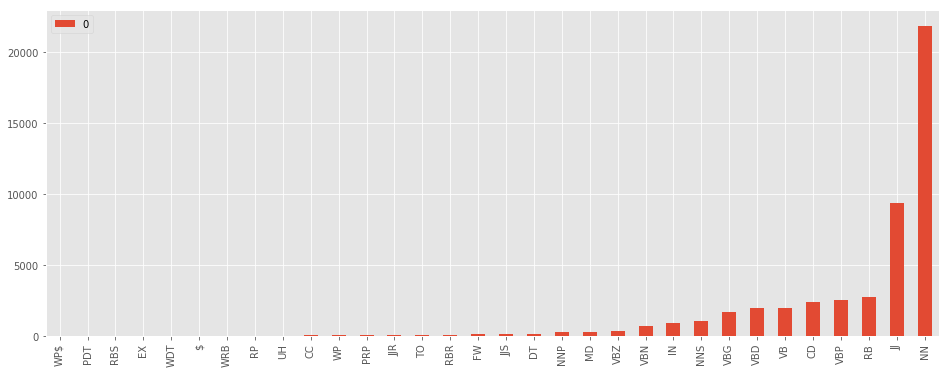

In [50]:
pd.DataFrame(counter,index=[0]).T.sort_values(by=[0],ascending=True).plot(kind='bar',figsize=(16,6))

##### <div align="center">Correlation between message length and spam vs ham text

In [51]:
df['text_length']=df['text'].apply(lambda x: len(x))
df.head()

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords,lemmatized_text,text_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis great world la buffet Cine there got amore wat,go until jurong point crazy available only in bugis great world la buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, great, world, la, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, great, world, la, buffet, cine, got, amore, wat]",111
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif oni,ok lar joking wif oni,"[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]","[ok, lar, joking, wif, oni]",29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",155
3,ham,U dun say so early hor... U c already then say...,dun say so early hor already then say,dun say so early hor already then say,"[dun, say, so, early, hor, already, then, say]","[dun, say, early, hor, already, say]","[dun, say, early, hor, already, say]",49
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think he goes to usf he lives around here though,nah dont think he goes to usf he lives around here though,"[nah, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",61


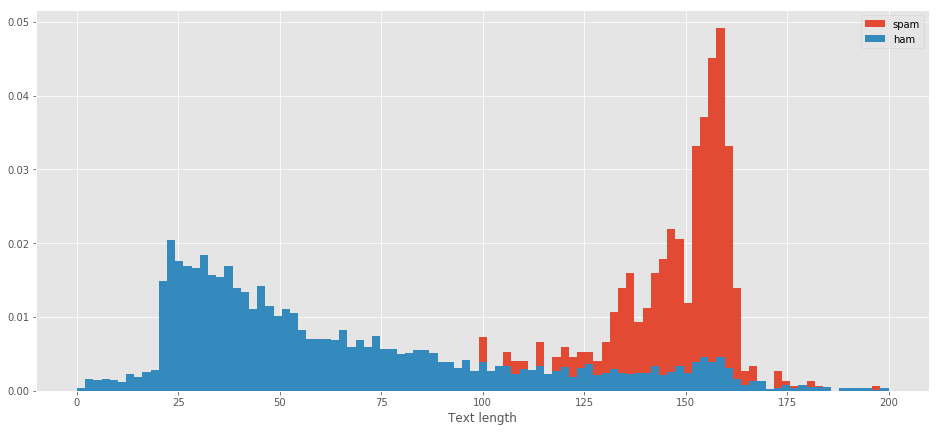

In [52]:
plt.figure(figsize=(16,7))
num_bins=np.linspace(0,200,100)
plt.hist(df[df['target']=='spam']['text_length'],num_bins,label='spam',normed=True)
plt.hist(df[df['target']=='ham']['text_length'],num_bins,label='ham',normed=True)
plt.legend()
plt.xlabel('Text length')
plt.show()

##### <div align="center">Count of Upper Case words

In [53]:
def upper_case_words_len(text):
    return sum(map(str.isupper, text.split()))

In [54]:
df['upper_case_words_len']=df['text'].apply(lambda x: upper_case_words_len(x))
df.sort_values(by=['upper_case_words_len'],ascending=False).head(3)

,target,text,text_without_punctuations,text_in_lower_case,tokenized_text,text_without_stopwords,lemmatized_text,text_length,upper_case_words_len
4316,ham,HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HOME AT MOMENT EVONE HATES ME EVEN U! WOT THE HELL AV I DONE NOW? Y WONT U JUST TELL ME TEXT BCK PLEASE LUV DAN,HIYA STU WOT UP 2IM IN SO MUCH TRUBLE AT HOME AT MOMENT EVONE HATES ME EVEN WOT THE HELL AV DONE NOW WONT JUST TELL ME TEXT BCK PLEASE LUV DAN,hiya stu wot up 2im in so much truble at home at moment evone hates me even wot the hell av done now wont just tell me text bck please luv dan,"[hiya, stu, wot, up, 2im, in, so, much, truble, at, home, at, moment, evone, hates, me, even, wot, the, hell, av, done, now, wont, just, tell, me, text, bck, please, luv, dan]","[hiya, stu, wot, 2im, much, truble, home, moment, evone, hates, even, wot, hell, av, done, wont, tell, text, bck, please, luv, dan]","[hiya, stu, wot, 2im, much, truble, home, moment, evone, hate, even, wot, hell, av, done, wont, tell, text, bck, please, luv, dan]",156,37
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE? IJUST TALKED TO YOUR MUM ALL MORNING! I HAD A REALLY GOOD TIME LAST NIGHT IM GOIN OUT SOON BUT CALL ME IF U CAN,HI DARLIN HOW WAS WORK DID GET INTO TROUBLE IJUST TALKED TO YOUR MUM ALL MORNING HAD REALLY GOOD TIME LAST NIGHT IM GOIN OUT SOON BUT CALL ME IF CAN,hi darlin how was work did get into trouble ijust talked to your mum all morning had really good time last night im goin out soon but call me if can,"[hi, darlin, how, was, work, did, get, into, trouble, ijust, talked, to, your, mum, all, morning, had, really, good, time, last, night, im, goin, out, soon, but, call, me, if, can]","[hi, darlin, work, get, trouble, ijust, talked, mum, morning, really, good, time, last, night, im, goin, soon, call]","[hi, darlin, work, get, trouble, ijust, talked, mum, morning, really, good, time, last, night, im, goin, soon, call]",158,35
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I HAD COME CANT WAIT TO SEE YOU LOVE FRAN PS I WANT DIRTY ANAL SEX AND I WANT A 10 MAN GANG BANG,HI DARLIN HOPE YOU HAD NICE NIGHT WISH HAD COME CANT WAIT TO SEE YOU LOVE FRAN PS WANT DIRTY ANAL SEX AND WANT 10 MAN GANG BANG,hi darlin hope you had nice night wish had come cant wait to see you love fran ps want dirty anal sex and want 10 man gang bang,"[hi, darlin, hope, you, had, nice, night, wish, had, come, cant, wait, to, see, you, love, fran, ps, want, dirty, anal, sex, and, want, 10, man, gang, bang]","[hi, darlin, hope, nice, night, wish, come, cant, wait, see, love, fran, ps, want, dirty, anal, sex, want, 10, man, gang, bang]","[hi, darlin, hope, nice, night, wish, come, cant, wait, see, love, fran, p, want, dirty, anal, sex, want, 10, man, gang, bang]",141,34


##### <div align="center">Named Entity Recognition (NER) <div>
The default nltk class for NER defines Named entities as nouns whose words start with an initial Capital letter e.g India, Peter, IBM e.t.c. 

In [55]:
ne_entities=ne_chunk(tags)
print(ne_entities[0:100])

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('buffet', 'FW'), ('cine', 'NN'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ'), ('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('oni', 'VBP'), ('free', 'JJ'), ('entry', 'NN'), ('wkly', 'VBD'), ('comp', 'NN'), ('win', 'NN'), ('fa', 'JJ'), ('cup', 'VBZ'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('2005', 'CD'), ('text', 'NN'), ('fa', 'NN'), ('87121', 'CD'), ('receive', 'JJ'), ('entry', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetcs', 'NN'), ('apply', 'VBP'), ('08452810075over18s', 'CD'), ('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('already', 'RB'), ('say', 'VB'), ('nah', 'JJ'), ('dont', 'NN'), ('think', 'VBP'), ('go', 'VB'), ('usf', 'JJ'), ('life', 'NN'), ('around', 'IN'), ('though', 'IN'), ('freemsg', 'NN'), ('hey', 'NN'), ('darling', 'VBG'), ('week', 'NN'), ('word', '

In [56]:
ne_list = []
for subtree in ne_entities:
    if type(subtree) == Tree:
        ne_label = subtree.label()
        ne_string = " ".join([token for token, pos in subtree.leaves()])
        ne_list.append((ne_string, ne_label))
            
ne_list

[]

##### <div align="center">Document Term Matrix with CountVectorizer <div>

In [57]:
# Let's create a column with clean normalized text
def clean_text(text):
    return " ".join(text)
df['clean_tokenized_text']=df['lemmatized_text'].apply(lambda x:clean_text(x))

In [58]:
vectorizer=CountVectorizer()
matrix=vectorizer.fit_transform(df['clean_tokenized_text'].head(5))

In [59]:
# Let's check the number of documents and terms returned
matrix.shape

(5, 51)

In [60]:
# Get the terms
print(vectorizer.get_feature_names())

['08452810075over18s', '2005', '21st', '87121', 'already', 'amore', 'apply', 'around', 'available', 'buffet', 'bugis', 'cine', 'comp', 'crazy', 'cup', 'dont', 'dun', 'early', 'entry', 'fa', 'final', 'free', 'go', 'got', 'great', 'hor', 'joking', 'jurong', 'la', 'lar', 'life', 'may', 'nah', 'ok', 'oni', 'point', 'questionstd', 'ratetcs', 'receive', 'say', 'text', 'think', 'though', 'tkts', 'txt', 'usf', 'wat', 'wif', 'win', 'wkly', 'world']


In [61]:
# get the sparse array of terms
matrix.toarray()[0:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [62]:
# Let's create a DataFrame for the matrix 
count_vec_df=pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names())
count_vec_df

,08452810075over18s,2005,21st,87121,already,amore,apply,around,available,buffet,...,think,though,tkts,txt,usf,wat,wif,win,wkly,world
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0


##### <div align="center">Document Term Matrix with Term Frequency Inverse Document Frequency (tf-idf) <div>

In [63]:
# Instatiate the TfidfVectorizer class
tf_idf_vectorizer=TfidfVectorizer()
tf_idf_matrix=tf_idf_vectorizer.fit_transform(df['clean_tokenized_text'].head(5))
tf_idf_matrix

<5x51 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [64]:
# Let's check the number of documents and terms returned
tf_idf_matrix.shape

(5, 51)

In [65]:
# Get the terms
print(tf_idf_vectorizer.get_feature_names())

['08452810075over18s', '2005', '21st', '87121', 'already', 'amore', 'apply', 'around', 'available', 'buffet', 'bugis', 'cine', 'comp', 'crazy', 'cup', 'dont', 'dun', 'early', 'entry', 'fa', 'final', 'free', 'go', 'got', 'great', 'hor', 'joking', 'jurong', 'la', 'lar', 'life', 'may', 'nah', 'ok', 'oni', 'point', 'questionstd', 'ratetcs', 'receive', 'say', 'text', 'think', 'though', 'tkts', 'txt', 'usf', 'wat', 'wif', 'win', 'wkly', 'world']


In [66]:
# get the sparse array of weighted terms
tf_idf_matrix.toarray()[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2706569 , 0.        , 0.        , 0.2706569 , 0.2706569 ,
        0.2706569 , 0.2706569 , 0.        , 0.2706569 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21836428, 0.2706569 , 0.2706569 ,
        0.        , 0.        , 0.2706569 , 0.2706569 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2706569 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2706569 , 0.        , 0.        , 0.        ,
        0.2706569 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [67]:
# Let's create a DataFrame for the tf-idf matrix 
tf_idf_df=pd.DataFrame(tf_idf_matrix.toarray(),columns=tf_idf_vectorizer.get_feature_names())
tf_idf_df

,08452810075over18s,2005,21st,87121,already,amore,apply,around,available,buffet,...,think,though,tkts,txt,usf,wat,wif,win,wkly,world
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.270657,0.000000,0.000000,0.270657,0.270657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.270657,0.000000,0.000000,0.000000,0.270657
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000
2,0.196116,0.196116,0.196116,0.196116,0.000000,0.000000,0.196116,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.196116,0.196116,0.000000,0.000000,0.000000,0.196116,0.196116,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361529,0.000000,0.000000,...,0.361529,0.361529,0.000000,0.000000,0.361529,0.000000,0.000000,0.000000,0.000000,0.000000
